# Восстановление золота из руды

***Заказчик*** - компания, разрабатывающая решения для эффективной работы промышленных предприятий, ведет работу над оптимизацией золотодобывающего производства для предотвращения запуска предприятия с убыточными характеристиками.

***Задачи:*** 
1. Проверка правильности расчета признака ***rougher.output.recovery***, содержащего данные о эффективности флотационного обогащения золотой руды;
2. Подготовка прототипа модели машинного обучения, предсказывающей коэффициент восстановления золота из золотосодержащей руды.


***Исходные данные:*** исходный датасет с параметрами добычи и очистки золота, обучающая и тестовая выборки. Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-технологического-процесса" data-toc-modified-id="Описание-технологического-процесса-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание технологического процесса</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Обучающая-выборка" data-toc-modified-id="Обучающая-выборка-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Обучающая выборка</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Тестовая выборка</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-данных" data-toc-modified-id="Обработка-пропусков-данных-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Обработка пропусков данных</a></span></li><li><span><a href="#Преобразование-выборок" data-toc-modified-id="Преобразование-выборок-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Преобразование выборок</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-химического-состава-сырья-и-концентратов" data-toc-modified-id="Анализ-химического-состава-сырья-и-концентратов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ химического состава сырья и концентратов</a></span></li><li><span><a href="#Анализ-гранулометрического-состава-сырья" data-toc-modified-id="Анализ-гранулометрического-состава-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ гранулометрического состава сырья</a></span></li><li><span><a href="#Анализ-размаха-суммарных-концентраций-элементов" data-toc-modified-id="Анализ-размаха-суммарных-концентраций-элементов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ размаха суммарных концентраций элементов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Предсказание-эффективности-флотационного-обогащения" data-toc-modified-id="Предсказание-эффективности-флотационного-обогащения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Предсказание эффективности флотационного обогащения</a></span></li><li><span><a href="#Предсказание-эффективности-финального-обогащения" data-toc-modified-id="Предсказание-эффективности-финального-обогащения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Предсказание эффективности финального обогащения</a></span></li><li><span><a href="#Объединение-моделей" data-toc-modified-id="Объединение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Объединение моделей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание технологического процесса

Добытая золотоносная руда проходит первичную обработку, в результате которой получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку:

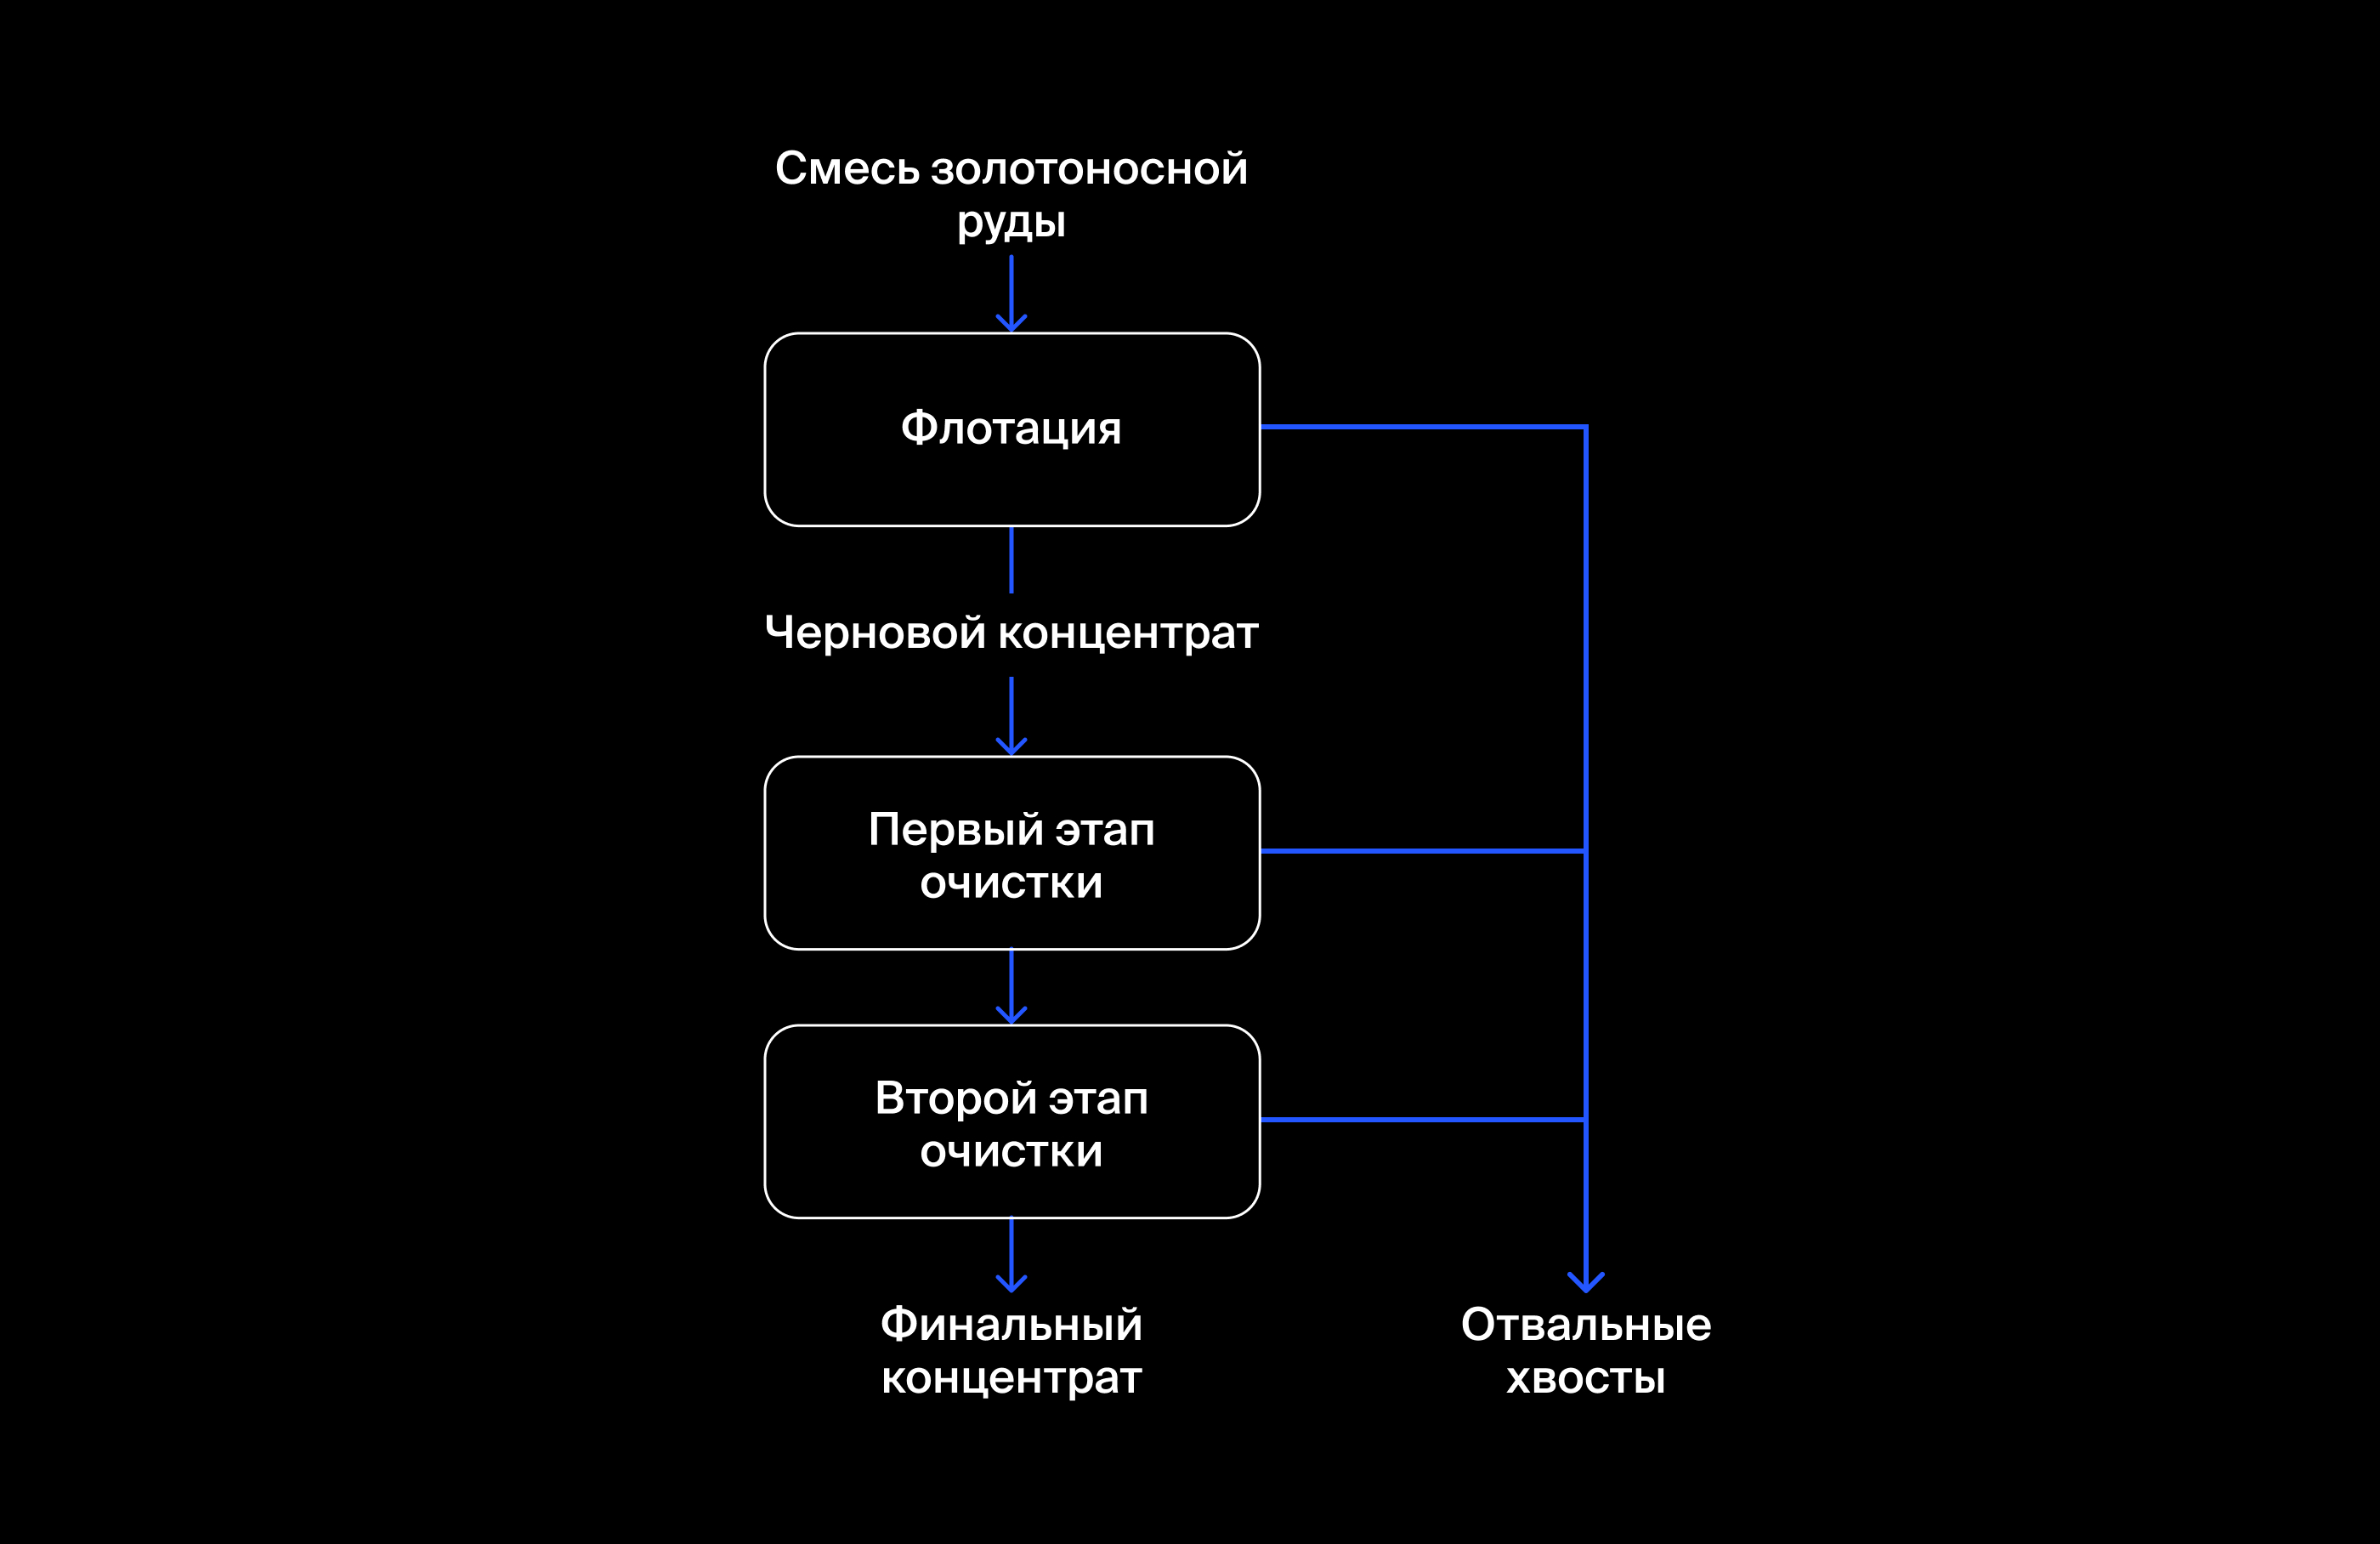

1. ***Флотация***

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).


2. ***Очистка***

Черновой концентрат проходит две стадии очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

### Описание данных

**Технологический процесс**

- *Rougher feed* — исходное сырье;
- *Rougher additions (или reagent additions)* — флотационные реагенты: Xanthate, Sulphate, Depressant;
- *Xanthate* — ксантогенат (промотер, или активатор флотации);
- *Sulphate* — сульфат (на данном производстве сульфид натрия);
- *Depressant* — депрессант (силикат натрия);
- *Rougher process* (англ. «грубый процесс») — флотация;
- *Rougher tails* — отвальные хвосты;
- *Float banks* — флотационная установка;
- *Cleaner process* — очистка;
- *Rougher Au* — черновой концентрат золота;
- *Final Au* — финальный концентрат золота.


**Параметры этапов**

- *air amount* — объём воздуха;
- *fluid levels* — уровень жидкости;
- *feed size* — размер гранул сырья;
- *feed rate* — скорость подачи.


**Наименование признаков**

Наименования признаков построены согласно следующей схеме:

[этап].[тип_параметра].[название_параметра]

*Пример:* rougher.input.feed_ag


**Значения для блока [этап]:**

- *rougher* — флотация;
- *primary_cleaner* — первичная очистка;
- *secondary_cleaner* — вторичная очистка;
- *final* — финальные характеристики.

**Значения для блока [тип_параметра]:**

- *input* — параметры сырья;
- *output* — параметры продукта;
- *state* — параметры, характеризующие текущее состояние этапа;
- *calculation* — расчётные характеристики.

## Подготовка данных

Обновим библиотеку ***Scikit-Learn*** до последней версии:

In [1]:
! pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.24.2)


Импортируем необходимые для работы над проектом библиотки:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn import linear_model

Загрузим данные:

In [3]:
train_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

### Изучение данных

Далее изучим загруженные данные.

#### Исходные данные

Выведем на экран первые строки и общую информацию об исходных данных:

In [4]:
display(full_data.head())
full_data.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

В датасете всего 19439 строк. Часть столбцов содержит меньшее количество строк, что говорит о наличии пропусков данных.
Выведем на экран доли пропусков в каждом из столбцов датасета:

In [5]:
(full_data.isna().mean() * 100).round(2).to_frame().style.background_gradient(cmap='coolwarm')

,0
date,0
final.output.concentrate_ag,0.01
final.output.concentrate_pb,0.01
final.output.concentrate_sol,1.09
final.output.concentrate_au,0
final.output.recovery,0
final.output.tail_ag,0.01
final.output.tail_pb,0.52
final.output.tail_sol,0.03
final.output.tail_au,0


Проверим датасет на наличие грубых дубликатов:

In [6]:
print(full_data.duplicated().sum())

0


Грубые дубликаты не обнаружены.

###### Вывод

В рассмотренном датасете обнаружены пропуски данных. В столбце ***secondary_cleaner.output.tail_sol*** доля пропусков максимальна, и составляет ***8.99%***. В остальных столбцах доля пропусков находится в диапазоне от ***0.01%*** до ***2.24%***. Так как на основании исходных данных сформирована обучающая выборка, в ней тоже ожидается наличие пропусков. 

Способ обработки пропусков будет определен после ознакомления со всеми выборками.

В датасете отсутствуют грубые дубликаты.

В условиях задачи сказано, что данные индексируются датой и временем, поэтому для удобства дальнейших преобразований датасетов рекомендуется использовать данный столбец как индекс.

#### Обучающая выборка

Рассматриваемый датасет является обучающей выборкой из исходных данных. Выведем на экран первые строки и общую информацию о данных:

In [7]:
display(train_data.head())
train_data.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

В датасете всего 14149 строк. Часть столбцов содержит меньшее количество строк, что говорит о наличии пропусков данных.
Выведем на экран доли пропусков в каждом из столбцов датасета:

In [8]:
(train_data.isna().mean() * 100).round(2).to_frame().style.background_gradient(cmap='coolwarm')
(train_data.isna().mean() * 100).round(2).to_frame().style.background_gradient(cmap='coolwarm')

,0
date,0
final.output.concentrate_ag,0.01
final.output.concentrate_pb,0.01
final.output.concentrate_sol,1.49
final.output.concentrate_au,0
final.output.recovery,0
final.output.tail_ag,0
final.output.tail_pb,0.71
final.output.tail_sol,0.04
final.output.tail_au,0


Проверим датасет на наличие грубых дубликатов:

In [9]:
print(train_data.duplicated().sum())

0


Грубые дубликаты не обнаружены.

По условию задачи нам необходимо проверить правильность расчета признака ***rougher.output.recovery***, содержащего данные о эффективности флотационного обогащения золотой руды.

Степень обогащения рассчитывается по формуле ниже:

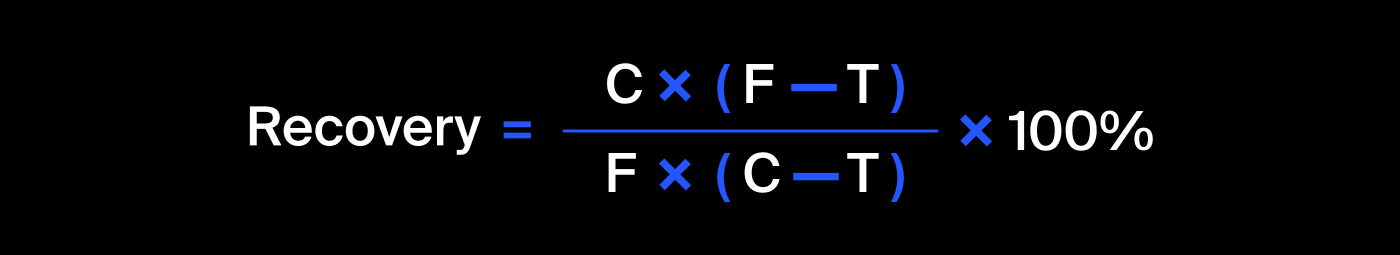

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

Рассчитаем степень обогащения по вышеуказанной формуле:

In [10]:
rougher_recovery_check = 100 * train_data['rougher.output.concentrate_au'] * (
    train_data['rougher.input.feed_au'] - 
    train_data['rougher.output.tail_au']) / (
    train_data['rougher.input.feed_au'] * (
        train_data['rougher.output.concentrate_au'] -
        train_data['rougher.output.tail_au'])
)

Для определения отклонения результатов рассчета степени обогащения по формуле от загруженных данных рассчитаем величину среднего абсолютного отклоения:

In [11]:
print('Среднее абсолютное отклонение:',
      mean_absolute_error(
        train_data['rougher.output.recovery'],
        rougher_recovery_check),'%'
     )

Среднее абсолютное отклонение: 1.1455109954099771e-14 %


###### Вывод

В обучающей выборке обнаружены пропуски данных. В столбце ***secondary_cleaner.output.tail_sol*** доля пропусков максимальна, и составляет ***11.34%***. В остальных столбцах доля пропусков находится в диапазоне от ***0.01%*** до ***3.08%***.

Способ обработки пропусков будет определен после ознакомления со всеми выборками.

Грубые дубликаты в обучающей выборке не обнаружены.

Маловероятно, что столбец ***date*** ценен как признак. По аналогии с иденичным столбцом в исходных данных рекомендуется использовать его как индекс.

Также на данном этапе была проведена проверка данных о степени флотационного обогащения столбца ***rougher.output.recovery*** расчетным путем. Среднее абсолютное отклонение табличных и расчетных данных, составившее ***1.15е-14%*** ничтожно мало, что позволяет считать, что эффективность обогащения рассчитанна верно.

#### Тестовая выборка

Выведем на экран первые строки и общую информацию о данных тестовой выборки:

In [12]:
display(test_data.head())
test_data.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

В выборке всего 5290 строк. Часть столбцов содержит меньшее количество строк, что говорит о пропусках данных.
Выведем на экран доли пропусков в каждом из столбцов датасета:

In [13]:
(test_data.isna().mean() * 100).round(2).to_frame().style.background_gradient(cmap='coolwarm')

,0
date,0
primary_cleaner.input.sulfate,0.08
primary_cleaner.input.depressant,0.09
primary_cleaner.input.feed_size,0
primary_cleaner.input.xanthate,0.08
primary_cleaner.state.floatbank8_a_air,0
primary_cleaner.state.floatbank8_a_level,0
primary_cleaner.state.floatbank8_b_air,0
primary_cleaner.state.floatbank8_b_level,0
primary_cleaner.state.floatbank8_c_air,0


В тестовой выборке наблюдается меньшее количество признаков, чем в исходных данных и обучающей выборке. Определим и выведем на экран отсутствующие признаки:

In [14]:
train_features_list = train_data.columns
test_features_list = test_data.columns

absent_test_features = sorted(list(set(train_features_list) - set(test_features_list)), key = str.lower)

absent_test_features

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Проверим датасет на наличие грубых дубликатов:

In [15]:
print(test_data.duplicated().sum())

0


Дубликаты не обнаружены.

###### Вывод

В тестовой выборке обнаружены пропуски данных. Максимальное количество пропущенных значений наблюдается в столбце ***rougher.input.floatbank11_xanthate*** и составляет ***0,47%***.

Грубые дубликаты в обучающей выборке не обнаружены.

В тестовой выборке отсутствует часть признаков, имеющихся в исходных данных и обучающей выборке. Данные признаки относятся к параметрам типов ***output*** и ***calculation***. Это связано с тем, что данные параметры замеряются и/или рассчитываются значительно позже остальных, в связи с чем будем считать, что в продакшне доступны будут только признаки из тестовой выборки. В связи с вышеописанным, при обучении ML-моделей дополнительные признаки учитываться не будут.

Среди отсутствующих признаков имеются и целевые. Рекомендуется подтянуть в качестве целевых признаков тестовой выборки данные столбцов ***rougher.output.recovery*** и ***final.output.recovery***  из исходных данных по совпадающим индексам.

Так как маловероятно, что столбец ***date*** ценен как признак, в дальнейшем используем его как индекс для подтягивания целевых признаков из исходных данных.

### Предобработка данных

На данном этапе проведем предобработку данных согласно сдеданным ранее выводам.

#### Обработка пропусков данных

Такие алгоритмы как ***Дерево решений*** и ***Случайный лес*** могут работать с пропусками данных, но для ***Линейной регрессии*** необходимо устранить пропуски. 

Обработаем пропуски данных в каждом из столбцов удалением объектов с пропусками. Несмотря на потерю значительной части данных, это позволит избежать искажения предсказаний.

In [16]:
full_data = full_data.dropna(0)
train_data = train_data.dropna(0)
test_data = test_data.dropna(0)

Проверим результат:

In [17]:
print('Количество пропусков в исходных данных:',full_data.isna().sum().sum())
print('Количество пропусков в обучающей выборке:',train_data.isna().sum().sum())
print('Количество пропусков в тестовой выборке:',test_data.isna().sum().sum())

Количество пропусков в исходных данных: 0
Количество пропусков в обучающей выборке: 0
Количество пропусков в тестовой выборке: 0


###### Вывод

Пропуски успешно устранены.

#### Преобразование выборок

Сначала преобразуем столбец ***date*** в каждой из выборок в индекс:

In [18]:
full_data = full_data.set_index('date')
train_data = train_data.set_index('date')
test_data = test_data.set_index('date')

Выведем на экран первые строки обновленных датасетов:

In [19]:
display(full_data.head(1))
display(train_data.head(1))
display(test_data.head(1))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


Столбцы ***date*** успешно преобразованы в индексы.

В задаче необходимо спрогнозировать сразу две величины: 

- эффективность обогащения чернового концентрата ***rougher.output.recovery***;
- эффективность обогащения финального концентрата ***final.output.recovery***.

Так как в тестовой выборке отсутствуют целевые признаки, сформируем их из исходных данных по индексам тестовой выборки:

In [20]:
rougher_target_test = full_data['rougher.output.recovery'][test_data.index]
final_target_test = full_data['final.output.recovery'][test_data.index]

Так как в тестовой выборке доступны не все признаки, имеющиеся в обучающей выборке, и по нашему предположению, тестовая выборка наиболее близка к данным из продакшна, необходимо сформировать новую обучающую выборку, содержащую только признаки из продакшна.

В задаче необходимо спрогнозировать сразу две величины. При этом не все признаки из обучающей выборки одинаково значимы для для каждой из величин. Например, для предсказания эффективности флотационного обогащения бесполезны признаки, связанные с последующими стадиями: очисткой первой и второй ступени. А для предсказания эффективности обогащения финального концентрата важны все стадии технологического процесса, так как каждая из стадий на определенную долю обогащает концентрат.

В связи с вышеописанным предпримем следующее:
 - Сформируем две обучающих выборки: 
 
  - для обучения модели, предсказывающей эффективность флотационного обогащения;
  - для обучения модели, предсказывающей эффективность обогащения финального концентрата;
  
  
 - В обучающих выборках оставим только целевые признаки и признаки, доступные в тестовой выборке;
 
 
 - Сформируем дополнительную тестовую выборку для проверки модели, предсказывающей эффективность флотационного обогащения.
  

Подготовим обучающую и тестовую выборки для обучения и проверки модели, предсказывающей эффективность флотационного обогащения. При этом, в обучающей выборке должны остаться только признаки, имеющиеся в тестовой выборке для этапа ***rougher***.

In [21]:
keyword = 'rougher'
rougher_features_list = [feature for feature in test_features_list if feature[:len(keyword)] == keyword]

rougher_features_test = test_data[rougher_features_list]

rougher_features_list.append('rougher.output.recovery')

rougher_train = train_data[rougher_features_list]

rougher_features_test.info()
print()
rougher_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 22 columns):
rougher.input.feed_ag                 5229 non-null float64
rougher.input.feed_pb                 5229 non-null float64
rougher.input.feed_rate               5229 non-null float64
rougher.input.feed_size               5229 non-null float64
rougher.input.feed_sol                5229 non-null float64
rougher.input.feed_au                 5229 non-null float64
rougher.input.floatbank10_sulfate     5229 non-null float64
rougher.input.floatbank10_xanthate    5229 non-null float64
rougher.input.floatbank11_sulfate     5229 non-null float64
rougher.input.floatbank11_xanthate    5229 non-null float64
rougher.state.floatbank10_a_air       5229 non-null float64
rougher.state.floatbank10_a_level     5229 non-null float64
rougher.state.floatbank10_b_air       5229 non-null float64
rougher.state.floatbank10_b_level     5229 non-null float64
rougher.state.floatbank10

Тестовая и обучающая выборка для модели предсказания эффективности флотационного обогащения успешно сформированы. Далее в обучающей выборке отделим целевой признак от выборки:

In [22]:
rougher_features_train = rougher_train.drop('rougher.output.recovery', axis = 1)
rougher_target_train = rougher_train['rougher.output.recovery']

На эффективность обогащения финального концентрата влияют все стадии технологического процесса, поэтому сформируем обучающую выборку для модели предсказания финальной степени очистки из всех признаков тестовой выборки с добавлением целевого признака ***final.output.recovery***:

In [23]:
test_features_list = test_data.columns
final_train = train_data[test_features_list].merge(
    train_data['final.output.recovery'],
    on = 'date')
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 53 columns):
primary_cleaner.input.sulfate                 11017 non-null float64
primary_cleaner.input.depressant              11017 non-null float64
primary_cleaner.input.feed_size               11017 non-null float64
primary_cleaner.input.xanthate                11017 non-null float64
primary_cleaner.state.floatbank8_a_air        11017 non-null float64
primary_cleaner.state.floatbank8_a_level      11017 non-null float64
primary_cleaner.state.floatbank8_b_air        11017 non-null float64
primary_cleaner.state.floatbank8_b_level      11017 non-null float64
primary_cleaner.state.floatbank8_c_air        11017 non-null float64
primary_cleaner.state.floatbank8_c_level      11017 non-null float64
primary_cleaner.state.floatbank8_d_air        11017 non-null float64
primary_cleaner.state.floatbank8_d_level      11017 non-null float64
rougher.input.feed_ag               

Обучающая выборка для модели предсказания эффективности финального обогащения успешно сформирована. Далее отделим целевой признак от выборки:

In [24]:
final_features_train = final_train.drop('final.output.recovery', axis = 1)
final_target_train = final_train['final.output.recovery']

display(final_features_train)
display(final_target_train)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


date
2016-01-15 00:00:00    70.541216
2016-01-15 01:00:00    69.266198
2016-01-15 02:00:00    68.116445
2016-01-15 03:00:00    68.347543
2016-01-15 04:00:00    66.927016
                         ...    
2018-08-18 06:59:59    73.755150
2018-08-18 07:59:59    69.049291
2018-08-18 08:59:59    67.002189
2018-08-18 09:59:59    65.523246
2018-08-18 10:59:59    70.281454
Name: final.output.recovery, Length: 11017, dtype: float64

Далее необходимо учесть, что у признаков тестовой выборки, а также в выборках обучения моделей предсказания эффективностей черновой и финальной очистки разные масштабы. При этом некоторые алгоритмы обучения могут сильнее выделять те или иные признаки. Для того, чтобы алгоритм воспринимал значимость каждого из признаков одинаково, необходимо стандартизировать признаки.

Проведем стандартизацию признаков выборок ***rougher_features_train, final_features_train, test_data, rougher_features_test***:

In [25]:
rougher_scaler = StandardScaler()
final_scaler = StandardScaler()

rougher_scaler.fit(rougher_features_train)
final_scaler.fit(final_features_train)

pd.options.mode.chained_assignment = None

rougher_features_train = pd.DataFrame(
    rougher_scaler.transform(rougher_features_train),
    columns = rougher_features_train.columns).set_index(
    rougher_features_train.index
)
rougher_features_test = pd.DataFrame(
    rougher_scaler.transform(rougher_features_test),
    columns = rougher_features_test.columns).set_index(
    rougher_features_test.index
)
final_features_train = pd.DataFrame(
    final_scaler.transform(final_features_train),
    columns = final_features_train.columns).set_index(
    final_features_train.index
)
final_features_test = pd.DataFrame(
    final_scaler.transform(test_data),
    columns = test_data.columns).set_index(
    test_data.index
)

In [26]:
display(rougher_features_train.head(1))
display(rougher_features_test.head(1))
display(final_features_train.head(1))
display(final_features_test.head(1))

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-1.419022,-1.186288,0.491332,-0.091397,0.055155,-0.905514,-0.111611,0.145181,-0.157326,0.125542,...,1.579676,0.538781,1.426107,0.43377,1.93166,0.265466,1.790173,0.172271,2.253977,0.233111


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2.312488,1.944909,0.112417,0.290569,1.193066,2.220447,1.529993,0.287948,1.510011,0.263793,...,-0.457669,1.198233,-0.308518,1.255866,-0.124208,1.260168,-0.463239,1.229505,-0.499486,1.250331


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.367857,0.232132,-0.253847,0.263598,-0.439751,-0.299391,-0.437737,-0.805158,-0.428123,-0.273942,...,-0.954978,-0.494542,-0.543467,-0.801519,-1.117141,-0.404191,-0.797167,-0.437365,-1.068253,-2.454879


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.942165,1.671775,1.188903,0.308291,-1.589346,-0.33767,-1.586063,-0.321986,-1.538243,-0.332162,...,-1.314941,-0.405656,-1.300441,-0.744714,-1.455476,1.220793,-1.344121,-0.427014,1.175984,0.224057


Выборки успешно стандартизированы

###### Вывод

На этапе предобработки данных пропущенные значения в исходных данных, обучающей и тестовой выборках, несмотря на потерю ряда объектов, ***удалены*** в связи с отсутствием логичной замены, а также во избежание сильных искажений при предсказании.

Также на данном этапе были сформированы отдельные обучающие выборки ( ***rougher_train*** и ***final_train*** ) и тестовые выборки ( ***rougher_features_test*** и ***final_features_test*** )   для модели, предсказывающей эффективность флотационного обогащения, и для модели, предсказывающей эффективность финального обогащения соответственно.

***rougher_train*** содержит признаки, касающиеся только стадии флотации, так как на ее эффективность не могут влиять последующие стадии. В рамках данной выборки признаки и целевые признаки сохранены в переменных ***rougher_features_train*** и ***rougher_target_train***.

***final_train*** содержит признаки, касающиеся всех стадий обогащения, так как на чистоту финального концентрата влияет каждая из стадий технологического процесса. В рамках данной выборки признаки и целевые признаки сохранены в переменных ***final_features_train*** и ***final_target_train***.

***rougher_features_test*** и ***final_features_test*** содержат тестовые признаки без целевых.

Так как в тестовой выборке отстутствовали целевые признаки ***rougher.output.recovery*** и ***final.output.recovery*** , они были сформированы из исходных данных по индексам тестовой выборки и сохранены в переменных ***rougher_target_test*** и ***final_target_test***.

## Исследовательский анализ данных

На данном этапе нам необходимо проанализировать:
 - Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки;
 - Изменение суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
 - Распределение размеров гранул сырья на обучающей и тестовой выборках.

### Анализ химического состава сырья и концентратов

Данные датасета ***full_data*** представлены в неудобном формате для анализа концентрации веществ на каждом из этапов очистки.

Сформируем новый датасет ***analyzed_data***, где оставим необходимые нам элементы для анализа и разделим их по стадиям и типам параметров:

In [27]:
analyzed_data = full_data.melt().groupby('variable').mean().reset_index()

analyzed_data[['stage','param_type','param_name']] = analyzed_data['variable'].str.split('.',expand = True)

analyzed_data = analyzed_data[
    (analyzed_data['param_name'] == 'concentrate_ag') |
    (analyzed_data['param_name'] == 'concentrate_au') |
    (analyzed_data['param_name'] == 'concentrate_pb') |
    (analyzed_data['param_name'] == 'concentrate_sol') |
    (analyzed_data['param_name'] == 'feed_ag') |
    (analyzed_data['param_name'] == 'feed_au') |
    (analyzed_data['param_name'] == 'feed_pb') |
    (analyzed_data['param_name'] == 'feed_sol')]\
    .drop('variable', axis = 1
         )

def get_elements(row):
    if row.endswith('ag') == True:
        return 'ag'
    if row.endswith('au') == True:
        return 'au'
    if row.endswith('pb') == True:
        return 'pb'
    if row.endswith('sol') == True:
        return 'sol'

analyzed_data['element'] = analyzed_data['param_name'].apply(get_elements)

analyzed_data.head()

,value,stage,param_type,param_name,element
0,5.190976,final,output,concentrate_ag,ag
1,44.307437,final,output,concentrate_au,au
2,9.997593,final,output,concentrate_pb,pb
3,9.871835,final,output,concentrate_sol,sol
13,8.674853,primary_cleaner,output,concentrate_ag,ag


Датасет успешно сформирован.

Построим и выведем на экран диаграмму изменения концентрации веществ (Au, Ag, Pb, Sol) на различных этапах очистки:

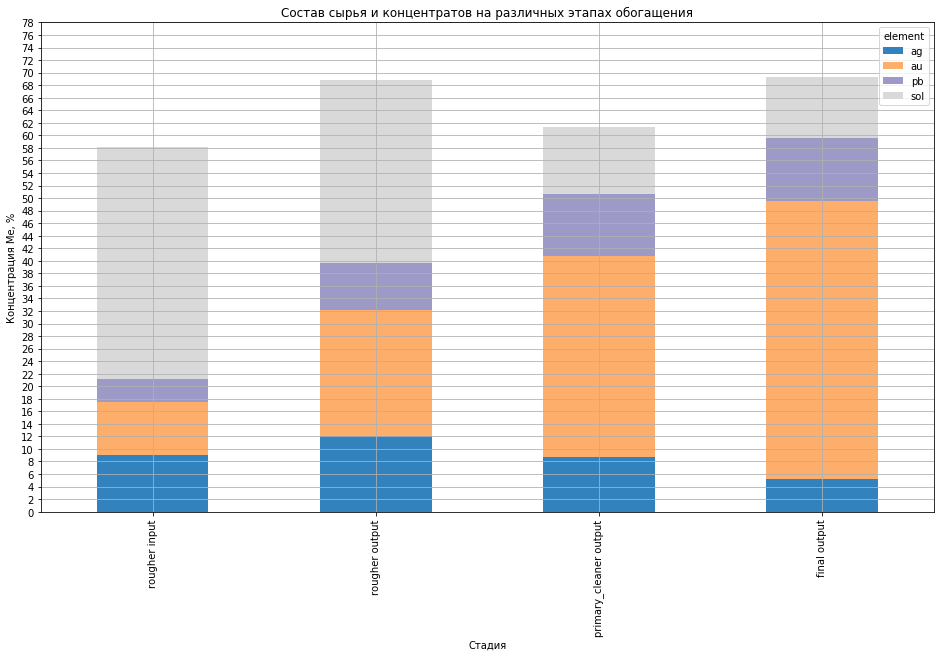

In [28]:
pivot = analyzed_data.pivot_table(
    index = ['stage','param_type'],
    columns = 'element',
    values = 'value',
    aggfunc = 'mean').reset_index().sort_values(by = 'au')

pivot ['stage'] = pivot[['stage','param_type']].apply(' '.join, axis = 1)

pivot.plot(
    'stage',
    kind = 'bar',
    grid = True,
    stacked = True,
    colormap = 'tab20c',
    figsize = (16,9)
)

plt.title('Состав сырья и концентратов на различных этапах обогащения')
plt.xlabel('Стадия')
plt.ylabel('Концентрация Me, %')
plt.yticks(np.arange(0, 80, step=2))
plt.show()

###### Вывод

Из диаграммы видно, что на этап флотации поступает сырье, содержащее ***57.0%*** отслеживаемых веществ, в том числе:

- Золото (Au): ***8.5%***;
- Серебро (Ag): ***9.0%***;
- Свинец (Pb): ***3.0%***;
- Неизвестные соли (Sol): ***36.5%***

***Флотационное обогащение*** основано на различной смачиваемости разделяемых компонентов. Поверхность целевых компонентов с помощью химических реагентов становится несмачиваемой, и они с пеной отделяются от смоченной и остающейся в пульпе пустой породы. Реагенты, используемые на этапе флотации, наиболее селективны к золоту и свинцу, что приводит к увеличению их содержания в черновом концентрате более, чем в 2 раза по сравнению с их концентрацией в исходном сырье. Флотация также концентрирует и серебро, но с меньшей эффективностью. Содержание неизвестных солей в черновом концентрате снижено относительно их содержания в исходном сырье. Это может быть связано с частичным растворением солей и сохранением растворенной части в пульпе. Увеличение суммарной концентрации отслеживаемых веществ связано со значительным удалением в хвосты пустой породы. Черновой концентрат после флотационного обогащения содержит ***68.0%*** отслеживаемых веществ, в том числе:

- Золото ( Au ): ***20.0%***;
- Серебро ( Ag ): ***12.0%***;
- Свинец ( Pb ): ***7.5%***;
- Неизвестные соли ( Sol ): ***28.5%***

Черновой концентрат после флотации потупает на ***первую ступень очистки***, которая в наибольшей степени селективна к золоту. На первой ступени также продолжает концентрироваться свинец, но в гораздо меньшей степени, а содержание серебра и неизвестных солей на данном этапе снижается - вероятнее всего данные вещества в концентрате заменяются другими элементами, состав которых зависит от способа очистки золота. Концентрат после первой ступени очистки содержит ***60,5%*** отслеживаемых веществ, в том числе:

- Золото ( Au ): ***32.0%***;
- Серебро ( Ag ): ***8.5%***;
- Свинец ( Pb ): ***9.5%***;
- Неизвестные соли ( Sol ): ***10.5%***

Концентрат первой ступени очистки поступает на ***вторую ступень***, где также преимущественно концентрируется золото и удаляется серебро. Содержание неизвестных солей незначительно снижается, а содержание свинца практически поддерживается на достигнутом уровне. Концентрат после второй, ***финальной***, ступени содержит ***68,5%*** отслеживаемых веществ, в том числе:

- Золото ( Au ): ***44.0%***;
- Серебро ( Ag ): ***5.5%***;
- Свинец ( Pb ): ***10.0%***.
- Неизвестные соли ( Sol ): ***9.0%***

Вероятнее всего заметное снижение концентрации серебра на первой и второй стадиях очистки связаны с его попутным извлечением, а концентрация свинца является побочным эффектом примененной технологии. Полученный концентрат, по всей видимости - не окончательный продукт, и предназначен для последующей тонкой очистки - аффинажа золота.

### Анализ гранулометрического состава сырья

Данные о размерах гранул сырья содержит признак ***rougher.input.feed_size***. Рассмотрим распределение размеров гранул сырья на обучающей и тестовой выборках:

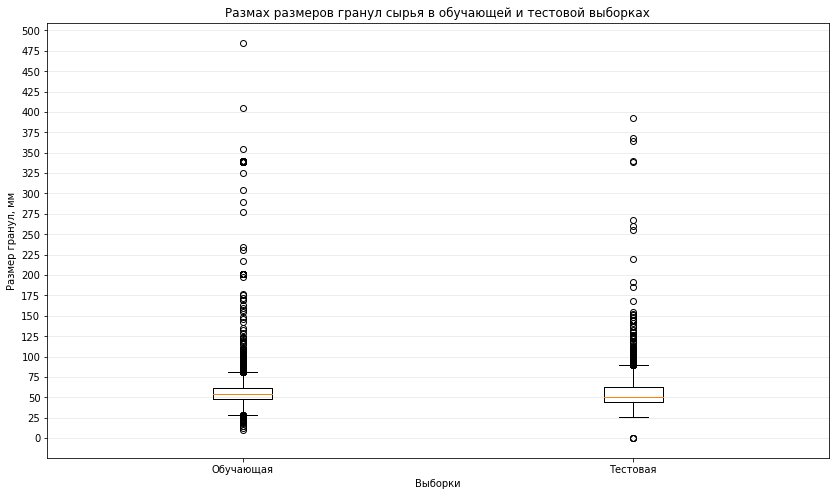

In [29]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

train = train_data['rougher.input.feed_size']
test = test_data['rougher.input.feed_size']

fig, ax1 = plt.subplots(figsize=(14, 8))
plt.boxplot([train,test])
plt.title('Размах размеров гранул сырья в обучающей и тестовой выборках')
plt.ylabel('Размер гранул, мм')
plt.xlabel('Выборки')
plt.yticks(np.arange(0, 525, step=25))
ax1.set_xticklabels(['Обучающая', 'Тестовая'])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

plt.show()

Из диаграмм размаха видно, что распределения размеров гранул в обучающей и тестовой выборках незначительно отличаются, но лежат в пределах одного диапазона.

Применим ***t-test*** для подтверждения статистической значимости выявленных отличий:

Каждая из выборок характеризует свою генеральную совокупность.

Сформулируем нулевую гипотезу, относительно которой мы будем проверять статистическую значимость результатов сравнения средних размеров гранул сырья:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***train*** и ***test***,  равны"*.

Тогда альтернативной гипотезой будет:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***train*** и ***test***,  не равны"*.

Критерий значимости, ***alpha***, примем равным ***0.05***. Параметру ***equal_var*** зададим значение ***True***, так как мы предполагаем, что выборки взяты из схожих генеральных совокупностей.

In [30]:
alpha = 0.05

results = st.ttest_ind(train,
                       test,
                       equal_var = True)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение:  2.111721458160281e-05
Отвергаем нулевую гипотезу


###### Вывод

Обнаруженные на диаграммах размаха редкие значения не будем считать аномальными, так как в технологии высоковероятны сбои при дроблении и измельчении руды.

Несмотря на то, что проведенный статистический тест позволяет нам считать, что средние размеры гранул двух выборок не равны, не будем предпринимать никаких действий с этим признаком, так как в данном случае важно, что разброс размеров гранул тестовой выборки находится в пределах разброса размеров гранул обучающей выборки, что значит, что обученная модель будет способна сделать верное предсказание по данному признаку, будучи примененной к тестовой выборке.

### Анализ размаха суммарных концентраций элементов 

Посмотрим, как распределены суммарные концентрации объектов исходных данных по стадиям:

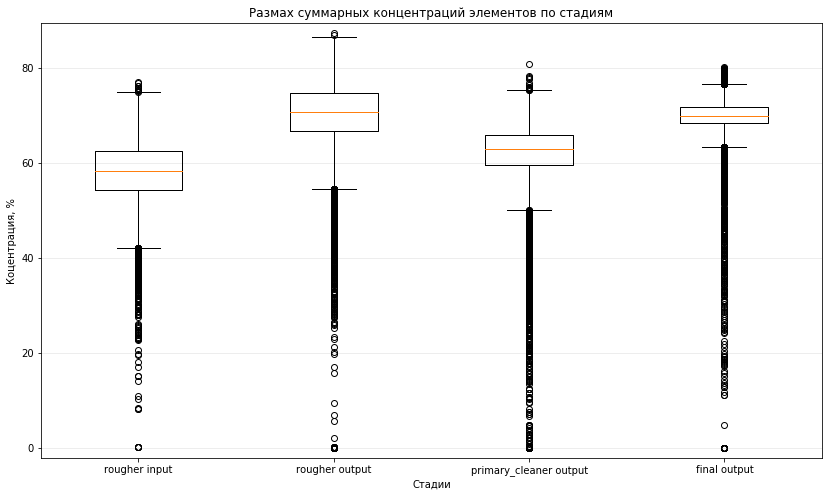

In [31]:
anomalies = full_data.reset_index().melt(id_vars = 'date')
anomalies[['stage','param_type','param_name']] = anomalies['variable'].str.split('.',expand = True)
anomalies['stage'] = anomalies[['stage','param_type']].apply(' '.join, axis = 1)
anomalies = anomalies[
    (anomalies['param_name'] == 'concentrate_ag') |
    (anomalies['param_name'] == 'concentrate_au') |
    (anomalies['param_name'] == 'concentrate_pb') |
    (anomalies['param_name'] == 'concentrate_sol') |
    (anomalies['param_name'] == 'feed_ag') |
    (anomalies['param_name'] == 'feed_au') |
    (anomalies['param_name'] == 'feed_pb') |
    (anomalies['param_name'] == 'feed_sol')]\
    .drop('variable', axis = 1
         )

anomalies_pivot = anomalies.pivot_table(
    index = 'date',
    columns = 'stage',
    values = 'value',
    aggfunc = 'sum'
)

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.boxplot([
    anomalies_pivot['rougher input'],
    anomalies_pivot['rougher output'],
    anomalies_pivot['primary_cleaner output'],
    anomalies_pivot['final output']]
)

plt.title('Размах суммарных концентраций элементов по стадиям')
plt.ylabel('Коцентрация, %')
plt.xlabel('Стадии')
ax1.set_xticklabels(['rougher input', 'rougher output', 'primary_cleaner output', 'final output'])
ax1.margins(0,0.025)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

plt.show()

Из диаграммы размаха видно, что на каждой стадии очистки есть нулевые суммарные концентрации элементов, что аномально.

Удалим из обучающих и тестовых выборок объекты, концентрация элементов в которых в сумме равна нулю:

In [32]:
wrong_rows = anomalies_pivot[
    (anomalies_pivot['rougher input'] == 0) |
    (anomalies_pivot['rougher output'] == 0) |
    (anomalies_pivot['primary_cleaner output'] == 0) |
    (anomalies_pivot['final output'] == 0)
]

def delete_rows(data):
    data = data[~data.index.isin(wrong_rows.index)]
    return data

rougher_features_train = delete_rows(rougher_features_train)
rougher_features_test = delete_rows(rougher_features_test)
rougher_target_train = delete_rows(rougher_target_train)
rougher_target_test = delete_rows(rougher_target_test)
final_features_train = delete_rows(final_features_train)
final_features_test = delete_rows(final_features_test)
final_target_train = delete_rows(final_target_train)
final_target_test = delete_rows(final_target_test)

###### Вывод

Объекты с индексами строк исходных данных, где были обнаружены нулевые суммарные концентрации элементов, были исключены из обучающих и тестовых выборок во избежание искажения результатов предсказаний.

## Модель

Напишем функцию для расчета симметричного среднего абсолютного процентного отклонения предсказаний одной модели, ***sMAPE***:

In [33]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_pred) + np.abs(y_true))) * 100

Напишем функцию для нахождения и удаления коллинеарных признаков:

In [34]:
def remove_collinear_features(features, threshold):
    
    corr_matrix = features.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    features = features.drop(columns=drops)

    return features

Напишем функцию для подбора и вывода на экран наилучших гиперпараметров для получения нилучшего значения ***sMAPE***  с помощью инструмента ***GridSearchCV*** :

In [35]:
def get_best_params(
    model,
    features_train,
    target_train,
    max_depth,
    n_estimators):
    
    if model == DecisionTreeRegressor:
        params = {'max_leaf_nodes':range(2,10),
                  'max_depth':max_depth,
                  'random_state': [12345],
                 }
    elif model == RandomForestRegressor:
        params = {'max_leaf_nodes':range(2,10),
                  'max_depth':max_depth,
                  'n_estimators': n_estimators,
                  'random_state': [12345]
                 }
    else:
        params = {'fit_intercept': [True]}
        
    model = model()
    
    grid = GridSearchCV(
        model,
        params,
        scoring = make_scorer(smape, greater_is_better = False)
    )
    
    grid.fit(features_train,target_train)
    
    greed_result = pd.DataFrame(
        grid.cv_results_).sort_values(
        by = 'rank_test_score').reset_index(
        drop = True)

    display(greed_result[greed_result['rank_test_score']==1])

Напишем функцию для обучения и исследования моделей:

In [36]:
def explore_model(
    model,
    features_train,
    target_train,
    features_test,
    target_test,
    max_depth,
    max_leaf_nodes,
    n_estimators,
    random_state
):
        
    if model == DecisionTreeRegressor:
        
        reg = model(
            max_depth = max_depth,
            max_leaf_nodes = max_leaf_nodes,
            random_state = random_state
        )
        
    if model == RandomForestRegressor:
        
        reg = model(
            max_depth = max_depth,
            max_leaf_nodes = max_leaf_nodes,
            n_estimators = n_estimators,
            random_state = random_state
        )
        
    else:
        reg = model()
        
    reg.fit(features_train, target_train)
        
    predictions_train = reg.predict(features_train)
    predictions_test = reg.predict(features_test)
    
    dummy_regr = DummyRegressor(strategy = "mean")
    dummy_regr.fit(features_train, target_train)
    
    
    print('sMAPE на обучающей выборке:',
          smape(target_train,predictions_train).round(2))
    print('sMAPE на тестовой выборке:',
          smape(target_test,predictions_test).round(2))
    
    print('sMAPE dummy-модели на обучающей выборке:',
          smape(target_train,dummy_regr.predict(features_train)).round(2))
    print('sMAPE dummy-модели на тестовой выборке:',
          smape(target_test,dummy_regr.predict(features_test)).round(2))

### Предсказание эффективности флотационного обогащения

Перед обучением моделей проверим обучающую выборку на наличие коллинеарных признаков, устраним коллинеарность и пересохраним обновленную обучающую выборку.

In [37]:
rougher_features_train = remove_collinear_features(rougher_features_train, 0.75)

rougher.input.feed_au | rougher.input.feed_ag | 0.85
rougher.input.floatbank11_sulfate | rougher.input.floatbank10_sulfate | 0.99
rougher.input.floatbank11_xanthate | rougher.input.floatbank10_xanthate | 0.97
rougher.state.floatbank10_c_air | rougher.state.floatbank10_b_air | 0.92
rougher.state.floatbank10_c_level | rougher.state.floatbank10_b_level | 0.98
rougher.state.floatbank10_d_air | rougher.state.floatbank10_b_air | 0.91
rougher.state.floatbank10_d_air | rougher.state.floatbank10_c_air | 0.88
rougher.state.floatbank10_d_level | rougher.state.floatbank10_b_level | 0.98
rougher.state.floatbank10_d_level | rougher.state.floatbank10_c_level | 0.99
rougher.state.floatbank10_e_air | rougher.state.floatbank10_b_air | 0.81
rougher.state.floatbank10_e_air | rougher.state.floatbank10_c_air | 0.76
rougher.state.floatbank10_e_air | rougher.state.floatbank10_d_air | 0.88
rougher.state.floatbank10_e_level | rougher.state.floatbank10_b_level | 0.96
rougher.state.floatbank10_e_level | rougher.s

Коллинеарные признаки с коэффициентом корреляции Пирсона между собой ***> 0.75*** были обнаружены и удалены.
Выведем на экран первые строки обновленной обучающей выборки.

In [38]:
rougher_features_train.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level
date,,,,,,,,,,,
2016-01-15 00:00:00,-1.419022,-1.186288,0.491332,-0.091397,0.055155,-0.111611,0.145181,-0.651181,-0.243791,1.579676,0.538781
2016-01-15 01:00:00,-1.386775,-1.203925,0.510914,0.003360,-0.175142,-0.116740,0.142998,-0.647638,-0.202331,1.566661,0.256565
2016-01-15 02:00:00,-1.410486,-1.303332,0.564082,0.015626,-0.127510,-0.133564,0.331025,-0.651103,-0.202423,1.558488,0.255545
2016-01-15 03:00:00,-1.449322,-1.417129,0.705126,0.030541,0.066863,-0.230176,0.336716,-0.650521,-0.203730,1.562653,0.244221
2016-01-15 04:00:00,-1.439974,-1.651546,0.682016,-0.061756,-0.481937,-0.453769,0.332447,-0.651353,-0.199094,1.563514,0.263118


В выборке оставлено 11 признаков.

Приведем тестовую выборку в соотвествие с обучающей:

In [39]:
rougher_features_test = rougher_features_test[rougher_features_train.columns]
rougher_features_test.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level
date,,,,,,,,,,,
2016-09-01 00:59:59,2.312488,1.944909,0.112417,0.290569,1.193066,1.529993,0.287948,-0.638084,0.313246,-0.457669,1.198233
2016-09-01 01:59:59,2.263488,1.841546,0.115907,0.250950,1.010930,1.556483,0.136401,-0.657392,0.311957,-0.465415,1.182704
2016-09-01 02:59:59,2.317714,1.748591,0.110445,0.512295,1.307396,1.553153,-0.009234,-0.658456,0.318610,-0.470921,1.176809
2016-09-01 03:59:59,1.925934,1.457310,-0.035494,0.140162,0.983058,1.400050,-0.057020,-0.647698,0.314579,-0.448534,1.206608
2016-09-01 04:59:59,1.356199,1.132797,0.095067,0.322552,1.028664,0.427350,-0.119679,-0.670532,0.310539,-0.140941,1.190751


Тестовая выборка успешно обновлена.

Далее определим модель, позволяющую получить наилучший результат предсказания эффективности флотационного обогащения.

Подберем наилучшие гиперпараметры для модели ***Дерево решений*** и посмотрим на значение метрики ***sMAPE***, рассчитанное с помощью кросс-валидации на 5 подвыборках:

In [85]:
get_best_params(
    DecisionTreeRegressor,
    rougher_features_train,
    rougher_target_train,
    range(1,11,1),
    None)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041198,0.001051,0.004215,0.000172,4,5,12345,"{'max_depth': 4, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
1,0.039719,0.000784,0.004077,0.000078,6,5,12345,"{'max_depth': 6, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
2,0.042005,0.001172,0.004069,0.000076,10,5,12345,"{'max_depth': 10, 'max_leaf_nodes': 5, 'random...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
3,0.063360,0.041030,0.004327,0.000383,8,5,12345,"{'max_depth': 8, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
4,0.040933,0.001951,0.004063,0.000174,7,5,12345,"{'max_depth': 7, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
5,0.040628,0.000818,0.004582,0.000631,5,5,12345,"{'max_depth': 5, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1
6,0.041289,0.001140,0.004664,0.000938,9,5,12345,"{'max_depth': 9, 'max_leaf_nodes': 5, 'random_...",-7.278036,-6.879281,-5.629684,-5.572027,-6.155352,-6.302876,0.677092,1


Наилучшие результаты получены при максимальной глубине дерева от ***4*** до ***10***, максимальном количестве узлов = ***5***. Полученное ***sMAPE = 6.3***.

Подберем наилучшие гиперпараметры для модели ***Случайный лес*** и посмотрим на значение метрики ***sMAPE***, рассчитанное с помощью кросс-валидации на 5 подвыборках:

In [86]:
get_best_params(
    RandomForestRegressor,
    rougher_features_train,
    rougher_target_train,
    [6],
    range(1,12,1)
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.159465,0.003842,0.005332,0.000188,6,7,6,12345,"{'max_depth': 6, 'max_leaf_nodes': 7, 'n_estim...",-7.264497,-6.805987,-4.64541,-5.693253,-6.138162,-6.109462,0.909589,1


Наилучшие результаты получены при максимальной глубине дерева = ***6*** , максимальном количестве узлов = ***7***,количестве деревьев = ***6***. Полученное ***sMAPE = 6.11***.

Рассчитаем кросс-валидацией значение метрики ***sMAPE*** для ***Линейной регрессии***:

In [87]:
get_best_params(
    LinearRegression,
    rougher_features_train,
    rougher_target_train,
    None,
    None)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085818,0.068414,0.042287,0.044708,True,{'fit_intercept': True},-6.860165,-6.74123,-3.980605,-5.284878,-7.123437,-5.998063,1.195053,1


Полученное ***sMAPE*** = ***6.00***.

Наилучшей моделью для предсказания эффективности флотационного обогащения будем считать ***Линейную регрессию***. 

Обучим модель, выведем на экран метрики ***sMAPE***, полученные на обучающей и тестовой выборках и сравним их с показателями ***Dummy-модели***:

In [89]:
explore_model(
    LinearRegression,
    rougher_features_train,
    rougher_target_train,
    rougher_features_test,
    rougher_target_test,
    None,
    None,
    None,
    None
)

sMAPE на обучающей выборке: 4.81
sMAPE на тестовой выборке: 4.24
sMAPE dummy-модели на обучающей выборке: 6.92
sMAPE dummy-модели на тестовой выборке: 5.3


###### Вывод

На этапе построения модели, предсказывающей эффективность флотационной очистки, были выявлены и удалены коллинеарные признаки из обучающей и тестовой выборок, после чего был осуществлен подбор гиперпараметров и выбор наилучшей модели с помощью ***GridSearchCV***.

Моделью, предсказывающей степень флотационной очистки с наименьшим показателем ***sMAPE*** оказалась ***Линейная регрессия***.

***sMAPE*** предсказаний ***Линейной регрессии*** ( ***4.24*** ) на тестовой выборке оказалось меньше ***sMAPE*** dummy-модели ( ***5.3*** ), в связи с чем мы можем считать нашу модель лучше константной.

### Предсказание эффективности финального обогащения

Перед обучением моделей проверим обучающую выборку на наличие коллинеарных признаков, устраним коллинеарность и пересохраним обновленную обучающую выборку.

In [40]:
final_features_train = remove_collinear_features(final_features_train, 0.75)

primary_cleaner.state.floatbank8_b_air | primary_cleaner.state.floatbank8_a_air | 0.96
primary_cleaner.state.floatbank8_b_level | primary_cleaner.state.floatbank8_a_level | 0.98
primary_cleaner.state.floatbank8_c_air | primary_cleaner.state.floatbank8_a_air | 0.95
primary_cleaner.state.floatbank8_c_air | primary_cleaner.state.floatbank8_b_air | 0.96
primary_cleaner.state.floatbank8_c_level | primary_cleaner.state.floatbank8_a_level | 0.97
primary_cleaner.state.floatbank8_c_level | primary_cleaner.state.floatbank8_b_level | 0.97
primary_cleaner.state.floatbank8_d_level | primary_cleaner.state.floatbank8_a_level | 0.75
rougher.input.feed_au | rougher.input.feed_ag | 0.85
rougher.input.floatbank11_sulfate | rougher.input.floatbank10_sulfate | 0.99
rougher.input.floatbank11_xanthate | rougher.input.floatbank10_xanthate | 0.97
rougher.state.floatbank10_c_air | rougher.state.floatbank10_b_air | 0.92
rougher.state.floatbank10_c_level | rougher.state.floatbank10_b_level | 0.98
rougher.state.fl

Коллинеарные признаки с коэффициентом корреляции Пирсона между собой ***> 0.75*** были обнаружены и удалены.
Выведем на экран первые строки обновленной обучающей выборки.

In [41]:
final_features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_d_air,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,...,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.367857,0.232132,-0.253847,0.263598,-0.439751,-0.299391,0.033828,-1.419022,-1.186288,0.491332,...,-0.015310,-0.867226,-0.339163,-0.129669,-0.275457,-0.954978,-0.494542,-0.801519,-1.068253,-2.454879
2016-01-15 01:00:00,-0.408223,0.281835,-0.253847,0.301810,-0.238558,-0.357471,0.104712,-1.386775,-1.203925,0.510914,...,-0.042312,-0.865693,-0.423293,-0.101357,-0.277810,-0.959412,-0.551661,-0.745417,-1.095601,-2.302048
2016-01-15 02:00:00,-0.458156,0.583692,-0.253847,0.270486,-0.044999,-0.331032,0.193043,-1.410486,-1.303332,0.564082,...,-0.041204,-0.875681,-0.412074,0.263387,-0.287920,-0.955307,-0.495165,-0.742132,-1.090183,-2.343448
2016-01-15 03:00:00,-0.500919,0.585426,-0.253847,0.285528,-0.057101,-0.358835,0.196243,-1.449322,-1.417129,0.705126,...,-0.027310,-0.866343,-0.421956,0.262749,-0.288869,-0.951425,-0.463651,-0.743132,-1.094314,-2.307322
2016-01-15 04:00:00,-0.619085,0.760460,-0.253847,0.321615,-0.046649,-0.301237,0.203997,-1.439974,-1.651546,0.682016,...,-0.047653,-0.863039,-0.423264,0.263626,-0.289882,-0.953088,-0.444353,-0.740814,-1.095906,-2.345198


В выборке оставлено 29 признаков.

Приведем тестовую выборку в соотвествие с обучающей:

In [42]:
final_features_test = final_features_test[final_features_train.columns]
final_features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_d_air,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,...,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.942165,1.671775,1.188903,0.308291,-1.589346,-0.337670,-0.513752,2.312488,1.944909,0.112417,...,-0.051563,-1.558076,0.443529,-1.679314,0.824352,-1.314941,-0.405656,-0.744714,1.175984,0.224057
2016-09-01 01:59:59,2.068873,1.670104,1.188903,0.268298,-1.590897,-0.332770,-0.511967,2.263488,1.841546,0.115907,...,-0.039070,-1.563272,0.448448,-1.658676,0.819295,-1.308696,-0.422704,-0.717281,0.874606,0.221280
2016-09-01 02:59:59,2.065216,1.047902,0.679015,0.283616,-1.593064,-0.356404,-0.512006,2.317714,1.748591,0.110445,...,-0.048114,-1.554305,0.445846,-1.661618,0.828139,-1.325991,-0.424062,-0.737060,0.870123,0.201008
2016-09-01 03:59:59,2.067321,0.788038,0.424071,-0.080611,-1.584491,-0.297976,-0.506479,1.925934,1.457310,-0.035494,...,-0.031105,-1.555810,0.461383,-1.674071,0.831118,-1.313219,-0.416171,-0.714632,0.861910,0.249284
2016-09-01 04:59:59,1.619249,0.396147,0.232864,-0.239845,-1.571912,-0.354653,-0.512064,1.356199,1.132797,0.095067,...,-0.030644,-1.567851,0.439293,-1.674991,0.820114,-1.314614,-0.462309,-0.729934,0.871637,0.195108


Тестовая выборка успешно обновлена.

Определим модель, позволяющую получить наилучший результат предсказания эффективности финального обогащения.

Подберем наилучшие гиперпараметры для модели ***Дерево решений*** и посмотрим на значение метрики ***sMAPE***, рассчитанное с помощью кросс-валидации на 5 подвыборках:

In [43]:
get_best_params(
    DecisionTreeRegressor,
    final_features_train,
    final_target_train,
    range(1,11,1),
    None)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036549,0.003096,0.004165,0.000243,1,2,12345,"{'max_depth': 1, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
1,0.062199,0.001801,0.004176,0.000225,3,2,12345,"{'max_depth': 3, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
2,0.063624,0.001112,0.004719,0.000479,5,2,12345,"{'max_depth': 5, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
3,0.062503,0.000985,0.004387,0.000124,9,2,12345,"{'max_depth': 9, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
4,0.064230,0.002145,0.004578,0.000234,4,2,12345,"{'max_depth': 4, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
5,0.062531,0.000878,0.004447,0.000127,10,2,12345,"{'max_depth': 10, 'max_leaf_nodes': 2, 'random...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
6,0.063315,0.001249,0.004714,0.000331,7,2,12345,"{'max_depth': 7, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
7,0.062564,0.001198,0.004626,0.000137,6,2,12345,"{'max_depth': 6, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
8,0.062967,0.001298,0.004816,0.000359,8,2,12345,"{'max_depth': 8, 'max_leaf_nodes': 2, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1
9,0.035177,0.001405,0.004338,0.000300,1,9,12345,"{'max_depth': 1, 'max_leaf_nodes': 9, 'random_...",-7.955074,-7.732193,-6.075263,-9.252294,-10.040794,-8.211124,1.362979,1


Наилучшие результаты получены при максимальной глубине дерева от ***1*** до ***10***. Полученное ***sMAPE = 8.21***.

Подберем наилучшие гиперпараметры для модели ***Случайный лес*** и посмотрим на значение метрики ***sMAPE***, рассчитанное с помощью кросс-валидации на 5 подвыборках:

In [48]:
get_best_params(
    RandomForestRegressor,
    final_features_train,
    final_target_train,
    [4],
    range(11,20,2)
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.706379,0.008279,0.011021,0.00039,4,2,13,12345,"{'max_depth': 4, 'max_leaf_nodes': 2, 'n_estim...",-7.915001,-7.700787,-6.043535,-9.06655,-10.017688,-8.148712,1.343319,1


Наилучшие результаты получены при максимальной глубине дерева = ***4***, количестве узлов = ***2*** и количестве деревьев = ***13***. Полученное ***sMAPE = 8.15***.

Рассчитаем кросс-валидацией значение метрики ***sMAPE*** для ***Линейной регрессии***:

In [49]:
get_best_params(
    LinearRegression,
    final_features_train,
    final_target_train,
    None,
    None)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102074,0.056709,0.105256,0.050937,True,{'fit_intercept': True},-9.665497,-7.76132,-7.903471,-9.001502,-9.817392,-8.829836,0.860575,1


Полученное ***sMAPE*** = ***8.83***.

Наилучшей моделью для предсказания эффективности финального обогащения также будем считать ***Случайный лес***.

Обучим модель, выведем на экран метрики ***sMAPE***, полученные на обучающей и тестовой выборках и сравним их с показателями ***Dummy-модели***:

In [50]:
explore_model(
    RandomForestRegressor,
    final_features_train,
    final_target_train,
    final_features_test,
    final_target_test,
    4,
    2,
    13,
    12345
)

sMAPE на обучающей выборке: 7.87
sMAPE на тестовой выборке: 7.68
sMAPE dummy-модели на обучающей выборке: 9.01
sMAPE dummy-модели на тестовой выборке: 8.08


###### Вывод

На этапе построения модели, предсказывающей эффективность финальной очистки, были выявлены и удалены коллинеарные признаки из обучающей и тестовой выборок, после чего был осуществлен подбор гиперпараметров и выбор наилучшей модели с помощью ***GridSearchCV***.

Моделью, предсказывающей степень флотационной очистки с наименьшим показателем ***sMAPE*** оказалась ***Случайный лес***.

***sMAPE*** предсказаний ***Случайного леса*** ( ***7.68*** ) на тестовой выборке оказалось меньше ***sMAPE*** dummy-модели ( ***8.08*** ), в связи с чем мы можем считать нашу модель лучше константной.

### Объединение моделей

Для удобства применения моделей предсказания эффективностей получения чернового и финального концентратов, объединим их в функцию ***gold_enrichment***. Функция принимает на вход признаки, по которым необходимо сделать предсказание, и возвращает предсказания.

In [52]:
def gold_enrichment(
    features_rougher,
    features_final,
):
    reg_rougher = LinearRegression()
    
    reg_final = RandomForestRegressor(
    max_depth = 2,
    max_leaf_nodes = 2,
    n_estimators = 13,
    random_state = 12345)
    
    reg_rougher.fit(rougher_features_train, rougher_target_train)
    reg_final.fit(final_features_train, final_target_train)
    
    predictions_rougher = reg_rougher.predict(features_rougher)
    predictions_final = reg_final.predict(features_final)
    
    return predictions_rougher, predictions_final

Напишем функцию для определения финального ***sMAPE***:

In [53]:
def result_smape(
    target_rougher,
    target_final,
    predictions_rougher,
    predictions_final
):
    result_rougher = np.mean(
        2 * np.abs(target_rougher - predictions_rougher) /
        (np.abs(predictions_rougher) + np.abs(target_rougher))) * 100
    
    result_final = np.mean(
        2 * np.abs(target_final - predictions_final) /
        (np.abs(predictions_final) + np.abs(target_final))) * 100
    
    result_total = (0.25 * result_rougher + 0.75 * result_final)
    
    return result_total

Проверим работу написанных функций:
 - Предсказания степеней очистки:

In [54]:
predictions_rougher, predictions_final = gold_enrichment(
    rougher_features_test,
    final_features_test)

- Определение итогового ***sMAPE***:

In [55]:
result_smape = result_smape(
    rougher_target_test,
    final_target_test,
    predictions_rougher,
    predictions_final)

print('Итоговое sMAPE: {:.3}'.format(result_smape))

Итоговое sMAPE: 6.82


Функции предсказания эффективностей очистки и определения итогового ***sMAPE*** работоспособны.

## Общий вывод

Задачей данного проекта было подготовить модель определения эффективности обогащения горнорудного сырья с целью получения золотого концентрата.

В рамках подготовки признаков в выборках были обнаружены пропущенные значения, которые не удалялись, а были заменены нулями с целью сохранить максимально приближенную стрруктуру к данным из продакшна. 

Также были обнаружены редкие значения в распределении размеров гранул сырья, а также разница в средних размерах гранул сырья в обучающей и тестовой выборках. Данные гранулометрического состава не обрабатывались, так как в технологии высоковероятны сбои при дроблении и измельчении руды, а диапазон размаха размеров гранул тестовой выборки не выходят за диапазон размеров гранул обучающей выборки.

Проведенный анализ изменения концентраций веществ на различных этапах обогащения подтвердил успешное концентрирование золота, концентрация которого от поступления на флотацию до выхода в виде финального уонцентрата увеличилась в ***5 раз***.

В объектах исходных данных были обнаружены нулевые концентрации элементов на каждой стадии, что аномально. Индексы аномальных объектов в дальнейшем были удалены из обучающих и тестовых выборок.

Этап обогащения разделен на получение чернового концентрата и получение финального концентрата.

Для каждого из этапов были подготовлены отдельные обучающие и тестовые признаки:

 - Для флотации: ***rougher_features_train*** и ***rougher_features_test***;
 - Для финального обогащения: ***final_features_train*** и ***final_features_test***.
 
Для увеличения метрик качества и повышения интерпретируемости моделей из признаков были удалены коллинеарные признаки.

Метрикой качества предсказаний модели было выбрано симметричное среднее абсолютное процентное отклонение, ***sMAPE***, одинаково учитывающая масштаб и целевого признака, и предсказания.

Лучшими моделями для предсказания эффективностей флотационной и финальной очистки оказалась ***Случайный лес***, позволившая достигнуть следующих метрик качества:

 - ***sMAPE*** предсказаний эффективности флотационной очистки:  ***4.42 %*** (против *5.30 %* на dummy-регрессоре);
 - ***sMAPE*** предсказаний эффективности финальной очистки:  ***7.68 %*** (против *8.08 %* на dummy-регрессоре);
 - ***sMAPE*** итоговый:  ***6.82 %*** (против *7.39 %* на dummy-регрессоре).
 
 Вышеописанные результаты подтверждают, что качество предсказаний обученных моделей выше, чем константных.